# Python and data tools for Non-Programmers WS23/24
## Project 2

### Load the dataset.csv file to Python. Use the df = pd.read_csv function of the pandas package.

In [1]:
import pandas as pd

In [2]:
file_p2 = 'dataset.csv'
df = pd.read_csv(file_p2)
print(df)

                            name    abb   cte_exp   Tg  \
0        Poly(dimethyl siloxane)   PDMS  0.000302  149   
1       Poly(ethyl methacrylate)   PEMA  0.000090  338   
2                Polyisobutylene    PIB  0.000183  202   
3      Poly(methyl methacrylate)   PMMA  0.000060  317   
4                     Polyamide6    PA6  0.000085  325   
5              Polyacrylonitrile    PAN  0.000065  383   
6             Poly(caprolactone)    PCL  0.000165  207   
7  Poly(chlorotrifluoroethylene)  PCTFE  0.000055  360   
8       Poly(ether ether ketone)   PEEK  0.000077  421   
9     Polyethylene terephthalate    PET  0.000070  350   

                                            smiles  
0                                    *O[Si](*)(C)C  
1                                *CC(*)(C)C(=O)OCC  
2                                       *CC(*)(C)C  
3                                 *CC(*)(C)C(=O)OC  
4                                    *CCCCCC(=O)N*  
5                                        *C

In [24]:
# name: polymer name
# abb: short name of polymer (abbreviation)
# cte_exp: measured coefficient of thermal expansion of the polymer in 1/K
# Tg: glass transition temperature (molecular mobility begins to take place) of the polymer in K
# smiles (simplified molecular-input line-entry system): language to represent the chemical structure of polymers

### Visualize the polymers using RDKit. Use the Draw.MolsToGridImage function and the legend argument to plot the polymers and the SMILES strings. 

In [4]:
# !pip install rdkit

In [3]:
from rdkit import Chem
from rdkit.Chem import Draw

In [4]:
# converting SMILES strings to RDKit molecule objects

molecules = [Chem.MolFromSmiles(smiles) for smiles in df.smiles]

In [5]:
# polymers with SMILES strings as legends + displaying 5 polymers in a row

draw_polymers = Draw.MolsToGridImage(molecules, legends = df.smiles.tolist(), molsPerRow = 5)

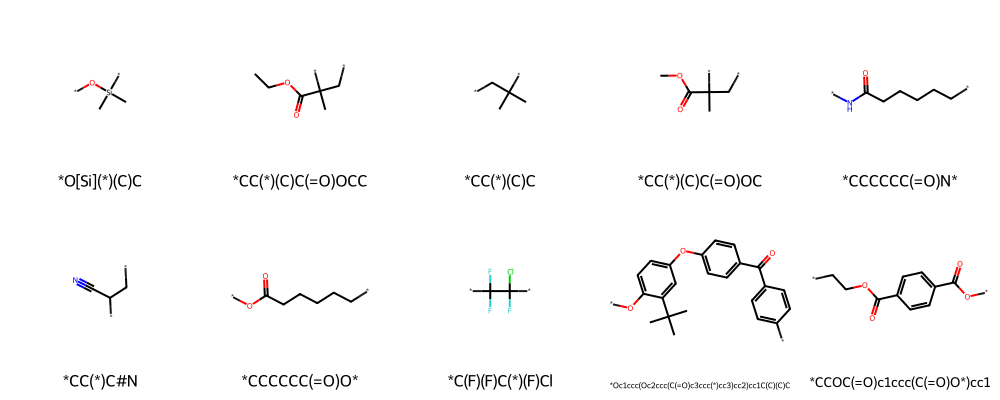

In [6]:
draw_polymers

### Use matplotlib to plot cte_exp (ordinate = y-coordinate) vs abb (abscissa = x-coordinate) using dots with dashed lines.

In [7]:
import matplotlib.pyplot as plt

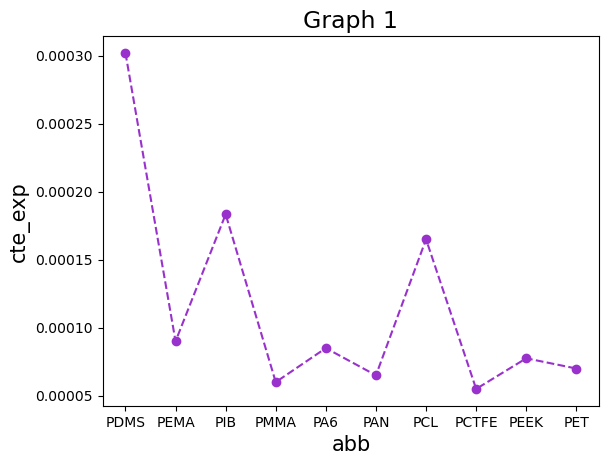

In [8]:
plt.plot(df['abb'], df['cte_exp'], 'o--', color = 'darkorchid')

# 'o--' = line plot with circular markers for each data point + line connecting these markers is dashed

plt.xlabel('abb', fontsize = 15)
plt.ylabel('cte_exp', fontsize = 15)
plt.title('Graph 1', fontsize = 17);

# semicolon at the end simply for a nicer look without displaying the text - Text(0.5, 1.0, 'Graph 1') - above the diagram

### The empirical rule by Boyer-Spencer (1962) states that cte_bs * Tg = 0.08. 
### Add a column cte_bs to the data frame that contains the computed cte_bs for each polymer.  
### Plot both cte_exp and cte_bs vs abb in an new plot.

In [9]:
# cte_bs*TG = 0.08 -> cte_bs = 0.08/Tg

df['cte_bs'] = 0.08 / df['Tg']

In [10]:
print(df) 

# checking for new column cte_bs

                            name    abb   cte_exp   Tg  \
0        Poly(dimethyl siloxane)   PDMS  0.000302  149   
1       Poly(ethyl methacrylate)   PEMA  0.000090  338   
2                Polyisobutylene    PIB  0.000183  202   
3      Poly(methyl methacrylate)   PMMA  0.000060  317   
4                     Polyamide6    PA6  0.000085  325   
5              Polyacrylonitrile    PAN  0.000065  383   
6             Poly(caprolactone)    PCL  0.000165  207   
7  Poly(chlorotrifluoroethylene)  PCTFE  0.000055  360   
8       Poly(ether ether ketone)   PEEK  0.000077  421   
9     Polyethylene terephthalate    PET  0.000070  350   

                                            smiles    cte_bs  
0                                    *O[Si](*)(C)C  0.000537  
1                                *CC(*)(C)C(=O)OCC  0.000237  
2                                       *CC(*)(C)C  0.000396  
3                                 *CC(*)(C)C(=O)OC  0.000252  
4                                    *CCCCCC(=

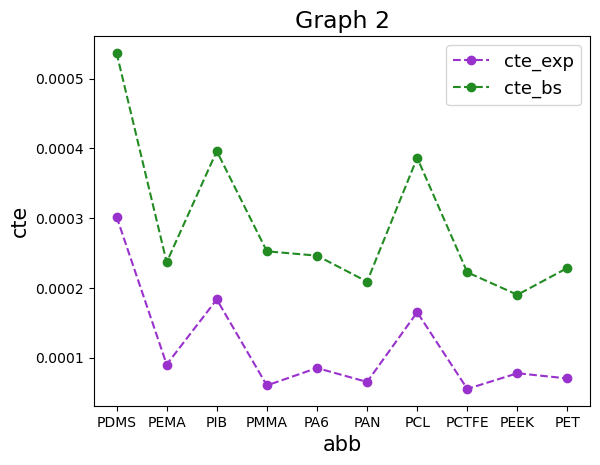

In [24]:
plt.plot(df['abb'], df['cte_exp'], 'o--', label = 'cte_exp', color = 'darkorchid')
plt.plot(df['abb'], df['cte_bs'], 'o--', label = 'cte_bs', color = 'forestgreen')

plt.xlabel('abb', fontsize = 15)
plt.ylabel('cte', fontsize = 15)
plt.title('Graph 2', fontsize = 17)
plt.legend(fontsize = 13);

### Find a new Boyer-Spencer parameter 'a' that better fits to the data set. 
### Use scipy's curve_fit function to fit the function cte = a / Tg. 
### You should find a = 0.035 (-> cte_bs_own = 0.035 / Tg). 
### Add cte_bs_own to the data frame and plot cte_exp, cte_bs, and cte_bs_own vs abb in a new plot to find out how much better the own rule fits the data.

In [13]:
# !pip install scipy

In [12]:
from scipy.optimize import curve_fit

In [ ]:
# curve fitting to find a line that best fits a collection of observations

In [13]:
# function to fit: cte_bs_own = a / Tg

def cte_function(Tg, a):
    return a / Tg

In [14]:
# finding a 

optimal_parameter, _ = curve_fit(cte_function, df['Tg'], df['cte_exp'])

# curve_fit() returns the optimal values for the mapping function - here: the coefficient value
# also returns a covariance matrix for the estimated parameters
# -> '_' ignoring the covariance matrix, not important/needed here

a = optimal_parameter[0]

# the array optimal_parameter contains the optimized value of the parameter i passed to the fitting function
# index 0 because i am looking for the first parameter that is stored there

In [15]:
optimal_parameter

array([0.03450633])

In [16]:
a

# ~0.035

0.0345063254147715

In [20]:
# Add cte_bs_own to df

df['cte_bs_own'] = a / df['Tg']

In [23]:
optimal_parameter / df['Tg']

0    0.000232
1    0.000102
2    0.000171
3    0.000109
4    0.000106
5    0.000090
6    0.000167
7    0.000096
8    0.000082
9    0.000099
Name: Tg, dtype: float64

In [21]:
print(df) 

# checking for new column cte_bs_own

                            name    abb   cte_exp   Tg  \
0        Poly(dimethyl siloxane)   PDMS  0.000302  149   
1       Poly(ethyl methacrylate)   PEMA  0.000090  338   
2                Polyisobutylene    PIB  0.000183  202   
3      Poly(methyl methacrylate)   PMMA  0.000060  317   
4                     Polyamide6    PA6  0.000085  325   
5              Polyacrylonitrile    PAN  0.000065  383   
6             Poly(caprolactone)    PCL  0.000165  207   
7  Poly(chlorotrifluoroethylene)  PCTFE  0.000055  360   
8       Poly(ether ether ketone)   PEEK  0.000077  421   
9     Polyethylene terephthalate    PET  0.000070  350   

                                            smiles    cte_bs  cte_bs_own  
0                                    *O[Si](*)(C)C  0.000537    0.000232  
1                                *CC(*)(C)C(=O)OCC  0.000237    0.000102  
2                                       *CC(*)(C)C  0.000396    0.000171  
3                                 *CC(*)(C)C(=O)OC  0.000252 

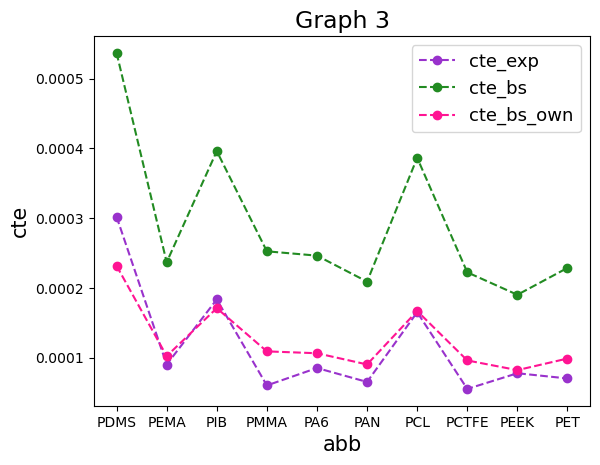

In [22]:
plt.plot(df['abb'], df['cte_exp'], 'o--', label = 'cte_exp', color = 'darkorchid')
plt.plot(df['abb'], df['cte_bs'], 'o--', label = 'cte_bs', color = 'forestgreen')
plt.plot(df['abb'], df['cte_bs_own'], 'o--', label = 'cte_bs_own', color = 'deeppink')

plt.xlabel('abb', fontsize = 15)
plt.ylabel('cte', fontsize = 15)
plt.title('Graph 3', fontsize = 17)
plt.legend(fontsize = 13);

#### Does the own rule fit the data better?
#### -> Yes! 
#### With my own parameter (0.35) i get lower cte values than with the Boyer-Spencer parameter (0.08), 
#### while also being close to cte_exp.